Import library yang diperlukan seperti nltk, wordcloud dll

In [210]:
import nltk
import os 
import re 

from nltk import (
    word_tokenize,
    sent_tokenize,
    probability,
    corpus,
    util,
    stem
)

from nltk.util import (
    bigrams,
    trigrams,
    ngrams
)

from nltk.stem import (
    wordnet,
    WordNetLemmatizer
)

import matplotlib.pyplot as plt 
from wordcloud import WordCloud

## Data Collecting

#### Siapkan datanya.. di sini kami mencoba mengambil data dari kisa bob sadino yang sudah ditransalikan ke dalam bahasa inggris

In [187]:
bob_sadino = """BOB SADINO or often known as Om Bob, is a very eccentric successful businessman. However, today Indonesia lost the figure of a white-haired businessman who looks simple.

Uncle Bob is enough with shorts and short sleeve shirts, he is confident to appear in public even in front of the media crew. Indeed the makeup is inversely proportional to the style of other entrepreneurs, who appear much more formal.


However, it is the simple clothes that become their own identity, so they are quickly recognized by the public.

This man who was born in Lampung on March 9, 1933 was the youngest of five siblings. Bob Sadino was born into a family with an economic background. His father who came from the city of Solo was a teacher who held a position as a principal in Tanjung Karang Middle and High School.

However, when Bob turned 19, his father died. Unexpectedly, his beloved father left his entire estate and inherited it specifically for him.

Indeed, all these assets were only given to him, because other siblings were considered sufficient.

Armed with inheritance money from his father, Bob decided to travel the world. His trip was stopped in the Netherlands and settled for approximately nine years.

In the country of the Windmills, he worked at Djakarta Lylod in Amsterdam and Hamburg, Germany. In addition to finding work, it turns out there he also found his life partner, namely Soelami Soejoed.

Feeling homesick, Bob returned to Indonesia in 1967 with his family. In addition, he also brought two of his favorite 1960s Mercedes cars, the results of his hard work.

In addition to missing, Bob also acknowledged the reason he returned to Indonesia because of his determination to no longer want to be an employee.

Sure enough when he arrived in Indonesia, he racked his brain to earn income by entrepreneurship. The first step he took was to sell one of his Mercedes cars and buy some land in the Kemang area, Jakarta.

Then he used the other car to become a business field by renting it out. Interestingly, the driver is himself.

But the unfortunate incident happened to him, his favorite car was in an accident, as a result caused quite severe damage. Unfortunately he has enough money to repair his car.

The loss of his sole livelihood forced Bob to become a mason or construction worker with a wage of Rp. 100.

Bob admitted, it was the darkest period of his life. In fact he was depressed because he felt unable to face the weight of the test of life. Fortunately, he met with one of his friends who advised him to raise chickens to fight depression.

Now that was the turning point for him to rise from adversity.

Bob also admitted that he was inspired a lot when raising chickens. The lives of his chickens fighting against life he made a role model for him to rise again.

Through raising chickens he began to reach the coffers of money by selling chicken eggs. Little by little the chicken egg selling business began to show progress, even many of its customers were foreigners.

As a result, his small business turned into a Kem Chicks Supermarket that specializes in serving foreigners, because he is proficient in foreign languages. After successfully grooming Kem Chicks, Bob began to explore other areas of business namely agribusiness, especially horticulture.

The business that manages the results of the vegetable plantation is called Kem Foods. With these two efforts, he delivered to be a successful entrepreneur.

Bob revealed the key to success is persistence. He always believes that success starts with failure. Therefore he is always committed to continue to maintain the will, commitment, dare to look for and continue to look for opportunities.

According to him, the success he had achieved could not be separated from the lack of knowledge he had. With his ignorance, Bob often manages to dive directly into the field and fails.

However, it is through failure that learns and becomes a strong and resilient person. According to him, many people who start from science, think and act completely sophisticated yet arrogant.

Because most people like that feel they have more knowledge than others."""

new_hamlet = bob_sadino.split(" ")

## Tokenization

#### Lakukan tokenization. lalu lihat 10 keyword yang paling sering muncul

In [221]:
# bikin function untuk tokenization
def tokenization(words):
    out_word = word_tokenize(words)
    fdist = probability.FreqDist(out_word)
    return fdist, out_word

fdist, tokenized = tokenization(bob_sadino)

# most common token 
fdist_top10 = fdist.most_common(10)
print(fdist_top10)

[('.', 46), (',', 41), ('to', 33), ('the', 31), ('of', 22), ('he', 21), ('his', 19), ('a', 16), ('Bob', 13), ('in', 12)]


## Bigram, Trigram, Ngram

#### melihat bigram, trigram dan ngram

In [222]:
quotes_token = tokenized
quotes_bigram = list(bigrams(quotes_token))
quotes_trigram = list(trigrams(quotes_token))
quotes_ngram = list(ngrams(quotes_token, n=5))
print("bigram \n".upper(), quotes_bigram[:10], "\n")
print("trigram \n".upper(),quotes_trigram[:10], "\n")
print("ngram where n = 5 \n".upper(),quotes_ngram[:10], "\n")

BIGRAM 
 [('BOB', 'SADINO'), ('SADINO', 'or'), ('or', 'often'), ('often', 'known'), ('known', 'as'), ('as', 'Om'), ('Om', 'Bob'), ('Bob', ','), (',', 'is'), ('is', 'a')] 

TRIGRAM 
 [('BOB', 'SADINO', 'or'), ('SADINO', 'or', 'often'), ('or', 'often', 'known'), ('often', 'known', 'as'), ('known', 'as', 'Om'), ('as', 'Om', 'Bob'), ('Om', 'Bob', ','), ('Bob', ',', 'is'), (',', 'is', 'a'), ('is', 'a', 'very')] 

NGRAM WHERE N = 5 
 [('BOB', 'SADINO', 'or', 'often', 'known'), ('SADINO', 'or', 'often', 'known', 'as'), ('or', 'often', 'known', 'as', 'Om'), ('often', 'known', 'as', 'Om', 'Bob'), ('known', 'as', 'Om', 'Bob', ','), ('as', 'Om', 'Bob', ',', 'is'), ('Om', 'Bob', ',', 'is', 'a'), ('Bob', ',', 'is', 'a', 'very'), (',', 'is', 'a', 'very', 'eccentric'), ('is', 'a', 'very', 'eccentric', 'successful')] 



## Stemer

#### selanjutnya, kita melakukan stemmer

In [224]:
# stemmer
stemmer = stem.PorterStemmer()
stemmed_out = [stemmer.stem(word) for word in new_hamlet]
stemmed_out_join = ' '.join(stemmed_out)
print("Sebelum stemming : \n".upper(),bob_sadino[:1000], "\n\n")
print("setelah stemming : \n".upper(), stemmed_out_join[:1000])

SEBELUM STEMMING : 
 BOB SADINO or often known as Om Bob, is a very eccentric successful businessman. However, today Indonesia lost the figure of a white-haired businessman who looks simple.

Uncle Bob is enough with shorts and short sleeve shirts, he is confident to appear in public even in front of the media crew. Indeed the makeup is inversely proportional to the style of other entrepreneurs, who appear much more formal.


However, it is the simple clothes that become their own identity, so they are quickly recognized by the public.

This man who was born in Lampung on March 9, 1933 was the youngest of five siblings. Bob Sadino was born into a family with an economic background. His father who came from the city of Solo was a teacher who held a position as a principal in Tanjung Karang Middle and High School.

However, when Bob turned 19, his father died. Unexpectedly, his beloved father left his entire estate and inherited it specifically for him.

Indeed, all these assets were onl

In [226]:
print("sebelum distemmer \n".upper(), hamlet_data[:500], "\n")
print("setelah distemmer \n".upper(), stemmed_out_join[:500], "\n")

SEBELUM DISTEMMER 
 [ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who ' s there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? Bar . He Fran . You come most carefully vpon your houre Bar . ' Tis now strook twelue , get thee to bed Francisco Fran . For this releefe much thankes : ' Tis bitter cold , And I am sicke at heart Barn . Haue you had quiet Guard ? Fran . Not a Mouse s 

SETELAH DISTEMMER 
 bob sadino or often known as Om bob, is a veri eccentr success businessman. however, today indonesia lost the figur of a white-hair businessman who look simple.

uncl bob is enough with short and short sleev shirts, he is confid to appear in public even in front of the media crew. inde the makeup is invers proport to the style of other entrepreneurs, who appear much more formal.


however, it is the simpl cloth that becom their own identity, so they are

## Lemmitaizers

In [227]:
lemmitaizers = []
words_to_lem = stemmed_out
word_lem = WordNetLemmatizer()
ls_word_lem = []
for words in words_to_lem:  
    ls_word_lem.append(word_lem.lemmatize(words))
    out = str(words+" "+"=>"+" "+word_lem.lemmatize(words))
    lemmitaizers.append(out)

out_lemmitaizers_join = ' '.join(ls_word_lem)
out_lemmitaizers_join[:500]

'bob sadino or often known a Om bob, is a veri eccentr success businessman. however, today indonesia lost the figur of a white-hair businessman who look simple.\n\nuncl bob is enough with short and short sleev shirts, he is confid to appear in public even in front of the medium crew. inde the makeup is invers proport to the style of other entrepreneurs, who appear much more formal.\n\n\nhowever, it is the simpl cloth that becom their own identity, so they are quickli recogn by the public.\n\nthi man who'

## Stop word removal

#### saatnya kita melakukan penghapusan kata kata puctuation, kata depan, kata sambung, pronoun dan lain sebagainya

In [214]:
# corpus.stopwords.words("english")
# menghilangkan punctuation / tanda baca
punctuation = re.compile(r"[.,:;&-?!()|0-9]")
post_punctuation = []
for words in ls_word_lem:
    word = punctuation.sub("", words)
    if len(word) > 0:
        post_punctuation.append(word)

# menghilangkan kata2 yang kurang bermakna seperti i, me , you dll
stops = corpus.stopwords.words("english")
final_hamlet = []
for idx, word in enumerate(post_punctuation):
    if word in stops:
        stops.remove(word)
    else:
        final_hamlet.append(word)

cleaned_story = []
thrash = ["the", "a", "of", "in", "is", "to", "wa", "he", "she", "hi", "it", "from", "by", "with", "In", "for", "that", "who"]       
for word in final_hamlet:
    if word in thrash or '\n\n' in word:
        final_hamlet.remove(word)
    else:
        cleaned_story.append(word)

final_hamlet_join = ' '.join(cleaned_story)

In [228]:
print(len(final_hamlet_join))

1489


## Ulangi kembali langkah di atas 

In [232]:
print("Pasca Text Processing\n".upper())

# tokenisasi
keyword_tags = final_hamlet_join
fdist_, tokenized_ = tokenization(final_hamlet_join)
print("length fdist : \n".upper(), len(fdist_), "\n")

# lihat yg plaing sering muncul
keyword_output = fdist_.most_common(10)
print("10 yang plaing sering muncul/common :\n".upper(), fdist_top10_, "\n")

# lihat kembali bigram, trigram dan ngram
quotes_token_ = tokenized_
quotes_bigram_ = list(bigrams(quotes_token_))
quotes_trigram_ = list(trigrams(quotes_token_))
quotes_ngram_ = list(ngrams(quotes_token_, n=5))
print("bigram :\n".upper(), quotes_bigram_[:10], "\n")
print("trigram :\n".upper(),quotes_trigram_[:10], "\n")
print("ngram where n = 5 :\n".upper(),quotes_ngram_[:10], "\n")

PASCA TEXT PROCESSING

LENGTH FDIST : 
 183 

10 YANG PLAING SERING MUNCUL/COMMON :
 [('bob', 9), ('and', 9), ('chicken', 4), ('turn', 3), ('becaus', 3), ('car', 3), ('sadino', 2), ('often', 2), ('success', 2), ('businessman', 2)] 

BIGRAM :
 [('bob', 'sadino'), ('sadino', 'often'), ('often', 'known'), ('known', 'Om'), ('Om', 'bob'), ('bob', 'eccentr'), ('eccentr', 'success'), ('success', 'businessman'), ('businessman', 'however'), ('however', 'today')] 

TRIGRAM :
 [('bob', 'sadino', 'often'), ('sadino', 'often', 'known'), ('often', 'known', 'Om'), ('known', 'Om', 'bob'), ('Om', 'bob', 'eccentr'), ('bob', 'eccentr', 'success'), ('eccentr', 'success', 'businessman'), ('success', 'businessman', 'however'), ('businessman', 'however', 'today'), ('however', 'today', 'indonesia')] 

NGRAM WHERE N = 5 :
 [('bob', 'sadino', 'often', 'known', 'Om'), ('sadino', 'often', 'known', 'Om', 'bob'), ('often', 'known', 'Om', 'bob', 'eccentr'), ('known', 'Om', 'bob', 'eccentr', 'success'), ('Om', 'bob',

## Lihat kembali 10 kata yang paling sering muncul

In [233]:
print(keyword_output)

[('bob', 9), ('and', 9), ('chicken', 4), ('turn', 3), ('becaus', 3), ('car', 3), ('sadino', 2), ('often', 2), ('success', 2), ('businessman', 2)]


## Lakukan visualisasi

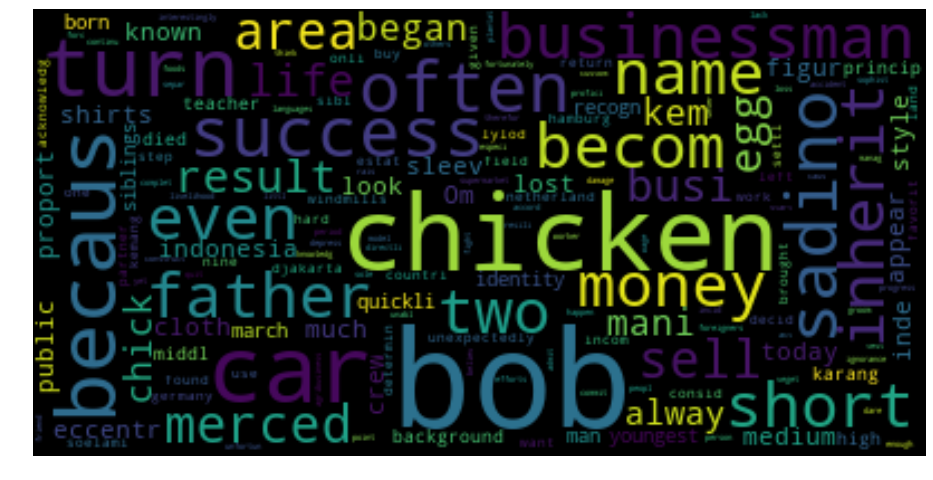

In [234]:
wordcloud = WordCloud(max_font_size=60).generate(keyword_tags)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()